In [1]:
import maze2 as mz2
import maze as mz
import numpy as np
import matplotlib.pyplot as plt
import qlearning as ql
from sarsa import sarsa
from MC import mc
import tqdm
from utility import monte_carlo_success

In [2]:
# Create a maze
maze = np.array([
    [0, 0, 1, 0, 0, 0, 0, 3],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0]
])
env = mz2.Maze(maze)
env_p0 = mz2.Maze(maze, poison_prob=0)
# env_old = mz.Maze(maze)
# env_old_p0 = mz.Maze(maze, poison_prob=0)

In [3]:
f = "results/VI_m2_p0_g0.98.npy"
# Discount Factor
gamma = 0.98
# Accuracy treshold
epsilon = 0.01
V, policy_1 = mz2.value_iteration(env_p0, gamma, epsilon)
np.save(f, (V))

In [4]:
print(monte_carlo_success(policy_1, env))
print(V[env.start_state()])

100%|██████████| 1000/1000 [00:05<00:00, 188.65it/s]

0.57
26.95143529126679


In [5]:
f2 = "results/q50k_m2_p0_eps0.2_g0.98.npy"
alpha = 2/3
epsilon = 0.2
n_episodes = 50000
Q_2, policy_2, v_start_2 = ql.qlearning(env_p0, gamma, alpha, epsilon, n_episodes)
np.save(f2, (Q_2))

100%|██████████| 50000/50000 [09:37<00:00, 86.60it/s] 


In [6]:
print(monte_carlo_success(policy_2, env))
print(Q_2[env.start_state()].max())

100%|██████████| 1000/1000 [00:05<00:00, 186.23it/s]

0.518
9.98675209994707


In [7]:
f3 = "results/q50k_m2_p0_eps0.1_g0.98.npy"
alpha = 2/3
epsilon = 0.1
n_episodes = 50000
Q_3, policy_3, v_start_3 = ql.qlearning(env_p0, gamma, alpha, epsilon, n_episodes)
np.save(f3, (Q_3))

100%|██████████| 50000/50000 [09:05<00:00, 91.73it/s] 


In [8]:
print(monte_carlo_success(policy_3, env))
print(Q_3[env.start_state()].max())

100%|██████████| 1000/1000 [00:04<00:00, 205.56it/s]

0.52
10.31649439132762


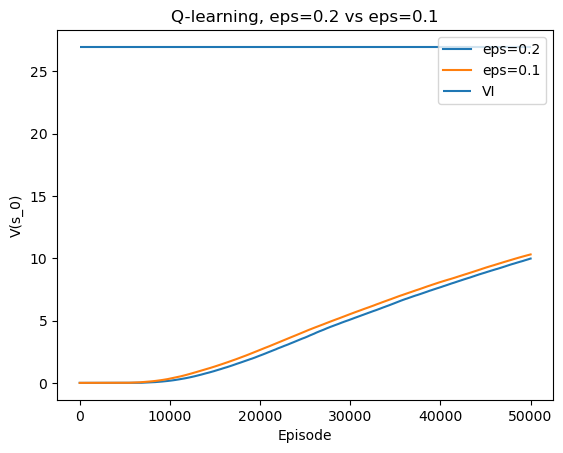

In [9]:
plt.plot(v_start_2, label="eps=0.2")
plt.plot(v_start_3, label="eps=0.1")
plt.xlabel("Episode")
plt.ylabel("V(s_0)")
plt.hlines(V[env.start_state()], 0, n_episodes, label="VI")
plt.legend()
plt.title("Q-learning, eps=0.2 vs eps=0.1")
plt.savefig("1.i.b.pdf")

In [10]:
epsilon = 0.2

In [11]:
f4 = "results/q50k_m2_p0_eps0.2_g0.98_a0.6.npy"
alpha = 0.6
n_episodes = 50000
Q_4, policy_4, v_start_4 = ql.qlearning(env_p0, gamma, alpha, epsilon, n_episodes)
np.save(f4, (Q_4))

100%|██████████| 50000/50000 [08:54<00:00, 93.59it/s] 


In [12]:
print(monte_carlo_success(policy_4, env))
print(Q_4[env.start_state()].max())

100%|██████████| 1000/1000 [00:04<00:00, 223.00it/s]

0.554
20.589329081236496


In [13]:
f5 = "results/q50k_m2_p0_eps0.2_g0.98_a0.9.npy"
alpha = 0.9
n_episodes = 50000
Q_5, policy_5, v_start_5 = ql.qlearning(env_p0, gamma, alpha, epsilon, n_episodes)
np.save(f5, (Q_5))

100%|██████████| 50000/50000 [12:04<00:00, 69.03it/s] 


In [14]:
print(monte_carlo_success(policy_5, env))
print(Q_5[env.start_state()].max())

100%|██████████| 1000/1000 [00:05<00:00, 176.04it/s]

0.379
0.016383505323183


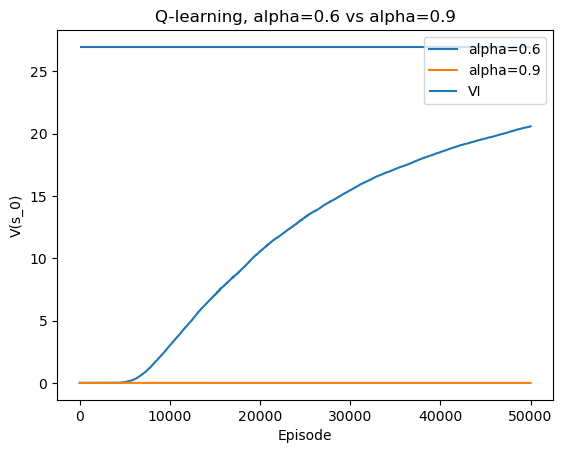

In [15]:
plt.plot(v_start_4, label="alpha=0.6")
plt.plot(v_start_5, label="alpha=0.9")
plt.xlabel("Episode")
plt.ylabel("V(s_0)")
plt.hlines(V[env.start_state()], 0, n_episodes, label="VI")
plt.legend()
plt.title("Q-learning, alpha=0.6 vs alpha=0.9")
plt.savefig("1.i.c.pdf")

## 1.j

In [16]:
f6 = "results/sarsa50k_m2_p0_eps0.2_g0.98.npy"
alpha = 2/3
epsilon = 0.2
n_episodes = 50000
Q_6, policy_6, v_start_6 = sarsa(env_p0, gamma, alpha, epsilon, n_episodes, eps_mode=0)
np.save(f6, (Q_6))

100%|██████████| 50000/50000 [08:43<00:00, 95.49it/s] 


In [17]:
print(monte_carlo_success(policy_6, env))
print(Q_6[env.start_state()].max())

100%|██████████| 1000/1000 [00:04<00:00, 214.85it/s]

0.557
11.345225751403706


In [18]:
f7 = "results/sarsa50k_m2_p0_eps0.1_g0.98.npy"
alpha = 2/3
epsilon = 0.1
n_episodes = 50000
Q_7, policy_7, v_start_7 = sarsa(env_p0, gamma, alpha, epsilon, n_episodes, eps_mode=0)
np.save(f7, (Q_7))

100%|██████████| 50000/50000 [08:06<00:00, 102.87it/s]


In [19]:
print(monte_carlo_success(policy_7, env))
print(Q_7[env.start_state()].max())

100%|██████████| 1000/1000 [00:06<00:00, 163.21it/s]

0.542
11.425860041650044


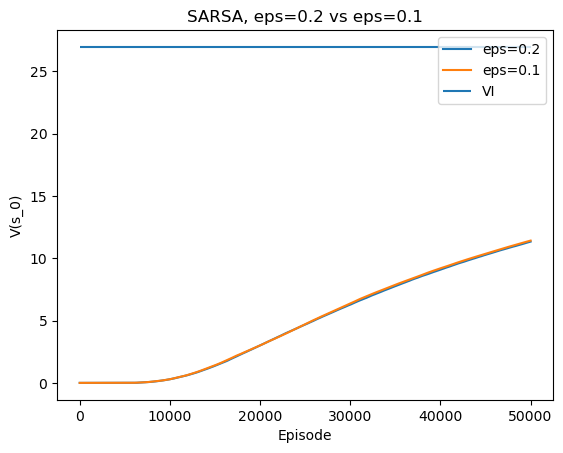

In [20]:
plt.plot(v_start_6, label="eps=0.2")
plt.plot(v_start_7, label="eps=0.1")
plt.xlabel("Episode")
plt.ylabel("V(s_0)")
plt.hlines(V[env.start_state()], 0, n_episodes, label="VI")
plt.legend()
plt.title("SARSA, eps=0.2 vs eps=0.1")
plt.savefig("1.j.b.pdf")

In [21]:
epsilon = 0.2

In [22]:
f8 = "results/sarsa50k_m2_p0_eps0.2_g0.98_d0.6.npy"
alpha = 2/3
n_episodes = 50000
delta=0.6
Q_8, policy_8, v_start_8 = sarsa(env_p0, gamma, alpha, epsilon, n_episodes, delta=delta, eps_mode=2)
np.save(f8, (Q_8))

100%|██████████| 50000/50000 [26:41<00:00, 31.21it/s]    


In [23]:
print(monte_carlo_success(policy_8, env))
print(Q_8[env.start_state()].max())

100%|██████████| 1000/1000 [00:12<00:00, 83.10it/s]

0.427
9.113411921698866


In [24]:
f9 = "results/q50k_m2_p0_eps0.2_g0.98_d0.9.npy"
alpha = 2/3
delta = 0.9
n_episodes = 50000
Q_9, policy_9, v_start_9 = sarsa(env_p0, gamma, alpha, epsilon, n_episodes, delta=delta, eps_mode=2)
np.save(f9, (Q_9))

100%|██████████| 50000/50000 [2:13:12<00:00,  6.26it/s]      


In [25]:
print(monte_carlo_success(policy_9, env))
print(Q_9[env.start_state()].max())

100%|██████████| 1000/1000 [00:07<00:00, 138.37it/s]

0.377
5.602607222425496


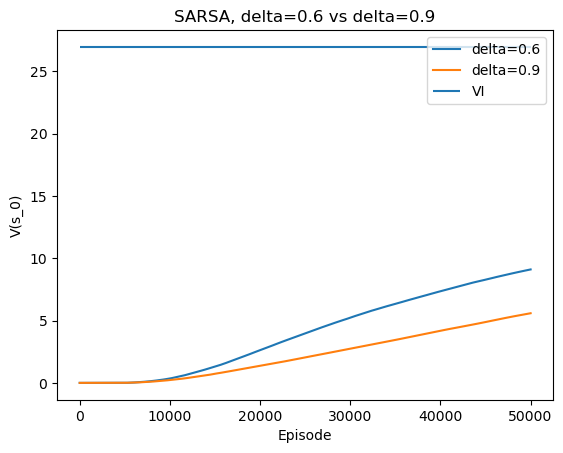

In [26]:
plt.plot(v_start_8, label="delta=0.6")
plt.plot(v_start_9, label="delta=0.9")
plt.xlabel("Episode")
plt.ylabel("V(s_0)")
plt.hlines(V[env.start_state()], 0, n_episodes, label="VI")
plt.legend()
plt.title("SARSA, delta=0.6 vs delta=0.9")
plt.savefig("1.j.c.pdf")